# Exoplanet detection by solar luminosity level
### Quantification of the coefficient of periodicity in a time series
\
In this notebook I will explore a dataset created with the use of the Kepler space telescope.
This dataset features an unusual shape - 5087 instances with 3198 variables.

[You can find the original dataset and its description here.](https://www.kaggle.com/datasets/keplersmachines/kepler-labelled-time-series-data?select=exoTrain.csv)

## 1. Initial data exploration and understanding

Let's begin by loading our data and some libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt

df_train = pd.read_csv("exoTrain.csv")
df_test  = pd.read_csv("exoTest.csv")

Let's take a look at what the first ten entries in our dataset look like:

In [2]:
df_train.head(10)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,2,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,2,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,2,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65
9,2,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91


As we can see, the first column (named 'LABEL') features either a 1 or a 2. From the original download page, we see that a label value of 1 means that there is not an exoplanet orbiting the star, where as 2 means that there is.

In [3]:
df_train.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


Let's see how many exoplanets we have in our dataset.

In [5]:
df_train['LABEL'].value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

As we can see, we have 37 confirmed exoplanets. The remaining stars do not have exoplanets orbiting them.

Now let's visualize some data. Lets graph the first several hundred columns of the first row.

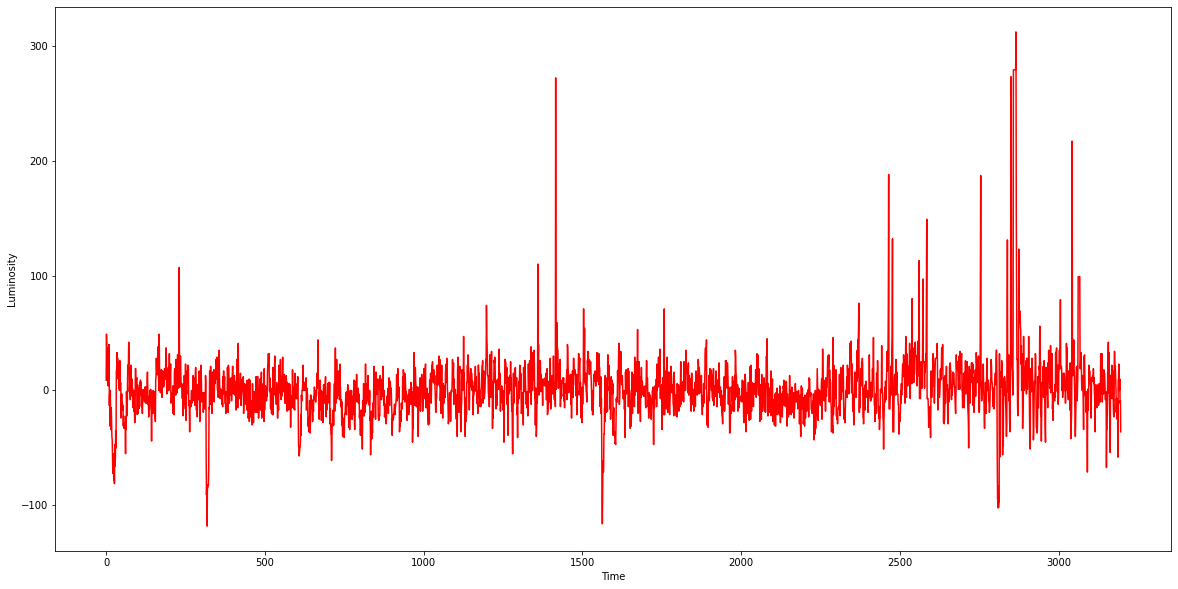

In [6]:
plt.figure(figsize=(20,10))
i = 0
values = []
for i in range(1, 3198):
    values.append(pd.Series([int(df_train.iloc[[6],[i]].values)]))
    i += 1

plt.xlabel('Time')
plt.ylabel('Luminosity')
plt.plot(values, 'r-')

We can clearly observe 3 large dips in FLUX - one around ~350, another at ~1580 and a third at ~2800. Using data available from the page of the dataset, we know that this entire measurement took roughly 80 days. That means that every FLUX value was captured once every ~36 minutes. Using that, we can estimate the oribtal period of this planet:

>((1580-350)+(2800-1580))/2*36/60/24 = 30,625

This means that this exoplanet orbits its parent star once every 30 Earth days!

Now let's do the same visualization for a star with a LABEL value of 1:

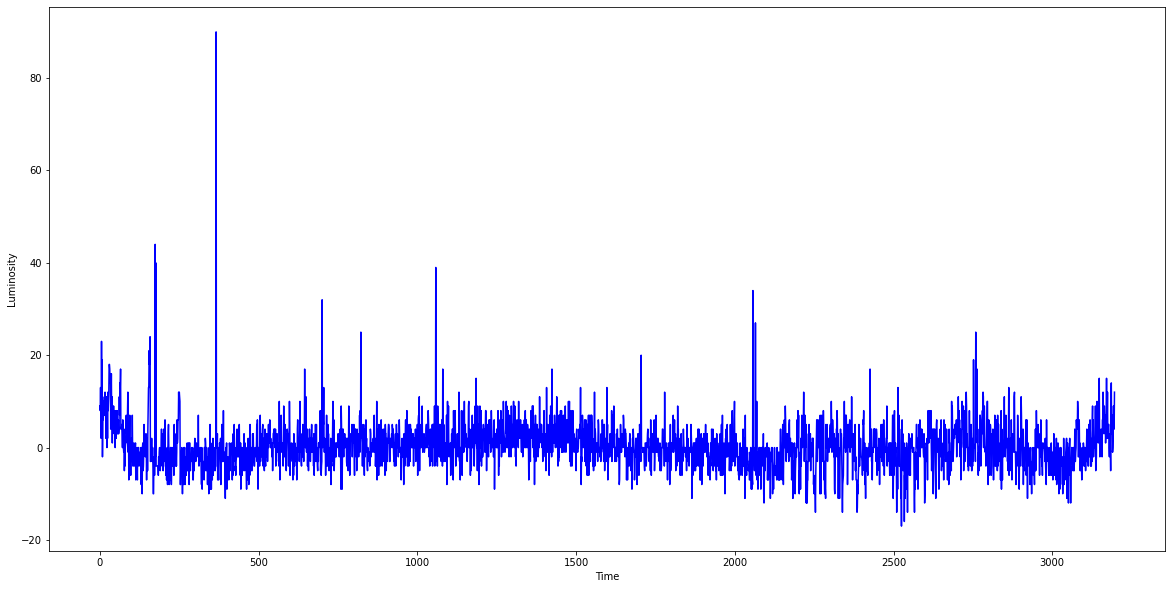

In [7]:
plt.figure(figsize=(20,10))
i = 0
values = []
for i in range(1, 3198):
    values.append(pd.Series([int(df_train.iloc[[50],[i]].values)]))
    i += 1

plt.xlabel('Time')
plt.ylabel('Luminosity')
plt.plot(values, 'b-')

What we see here is vastly different - there are no periodic dips in FLUX, instead the data seems to follow a generally stable trajectory, with a flat trend and the occasional large spike.

## 2. Data preparation and cleaning

Now it's time to prepare our data for processing.

Let's begin by transforming the LABEL column to binary, to allow for easier understanding.

In [8]:
df_train['LABEL'] = df_train['LABEL'].map({2: 1, 1: 0})
df_train

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,0,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,0,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,0,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,0,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


Next up, lets check if our dataset has any missing values.

In [9]:
print('The dataset has missing values: ' + str(df_train.isna().any().any()))

The dataset has missing values: False


Now let's use some of the learned methods of detecting outliers. My preferred tool for this is boxplot, as it allows a very clear reading of percentiles and outliers. The first row of boxplots will feature exoplanet stars, while the second row will feature no-exoplanet stars.

In [10]:
def visualize(df, title):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle(title)

    sns.boxplot(data=df.iloc[0, :], ax=axes[0,0], color='red')
    sns.boxplot(data=df.iloc[1, :], ax=axes[0,1], color='red')
    sns.boxplot(data=df.iloc[2, :], ax=axes[0,2], color='red')
    sns.boxplot(data=df.iloc[3, :], ax=axes[0,3], color='red')
    sns.boxplot(data=df.iloc[50, :], ax=axes[1,0])
    sns.boxplot(data=df.iloc[51, :], ax=axes[1,1])
    sns.boxplot(data=df.iloc[52, :], ax=axes[1,2])
    sns.boxplot(data=df.iloc[53, :], ax=axes[1,3])

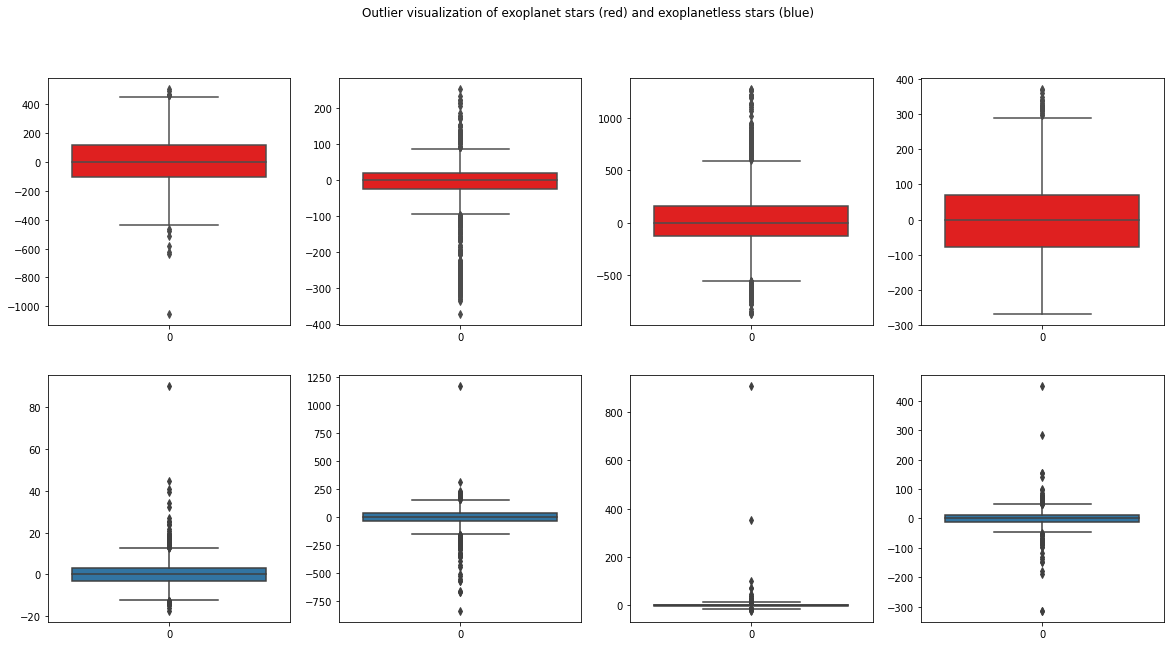

In [11]:
visualize(df_train, 'Outlier visualization of exoplanet stars (red) and exoplanetless stars (blue)')

Now let's remove the outliers, using a standard method based on InterQuartile Range (IQR)

In [12]:
def Remove_Outliers(df):
    # We use a double call of tranpose to flip the dataset's columns and rows, ensuring that the algorithm works.
    df = df.transpose()
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    trueList = trueList.transpose()
    return trueList

In [13]:
rem_outliers_subset = Remove_Outliers(df_train)
df_train_clean = df_train[rem_outliers_subset]
df_train_clean

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,0,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,NaN,NaN,NaN,NaN,NaN,-24.45,-17.00,3.23,19.28
5083,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,0,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,NaN,-6.41,-2.55


In [14]:
df_train_clean.isna().sum()

LABEL           0
FLUX.1       1470
FLUX.2       1377
FLUX.3       1307
FLUX.4       1205
             ... 
FLUX.3193     658
FLUX.3194     305
FLUX.3195     216
FLUX.3196     212
FLUX.3197     218
Length: 3198, dtype: int64

As we can see, the outlier removal process introuced a lot of NaN values, so let's fill all of them with the mean of their row.

In [15]:
for i in range(0, 5087):
    rowMean = df_train_clean.iloc[i,:].tail(3197).mean()
    df_train_clean.fillna(value=rowMean, inplace=True)

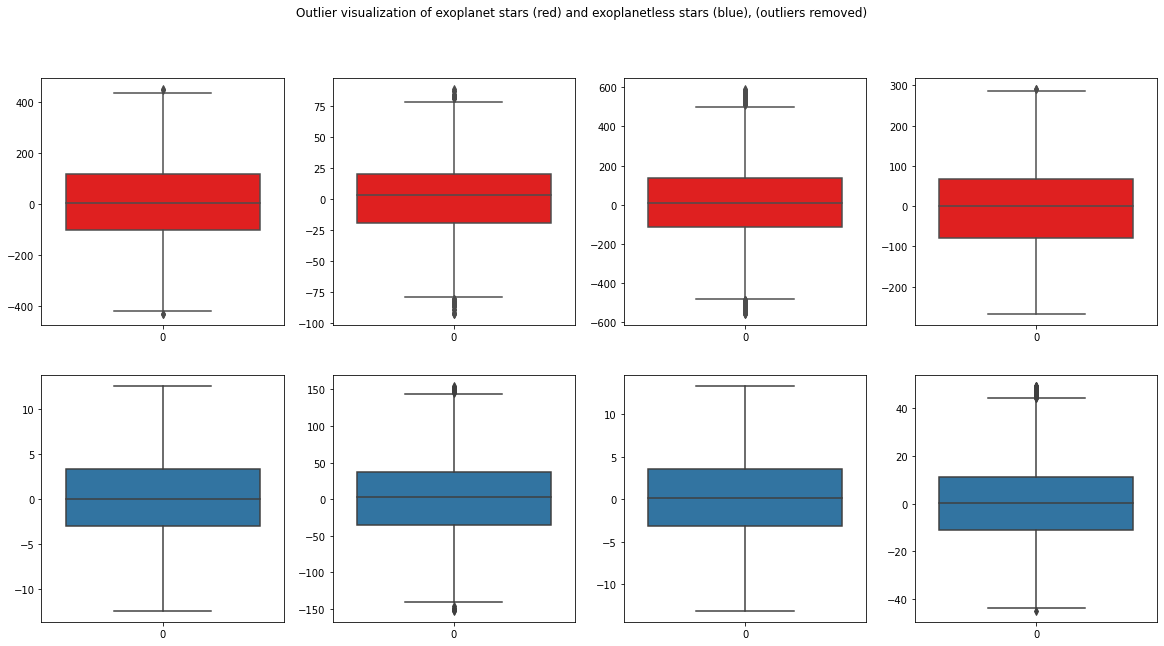

In [16]:
visualize(df_train_clean, 'Outlier visualization of exoplanet stars (red) and exoplanetless stars (blue), (outliers removed)')

We can now see a big improvement in the boxplots, especially in the row of no-exoplanet stars. 

Let's scale all of our data using SKLearn's scaler.

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = sklearn.preprocessing.MinMaxScaler()

# Store LABEL row separately
labelTemp = df_train_clean.iloc[:, 0]

# We use the double transpose trick again
df_train_clean = df_train_clean.transpose()

df_train_clean

,0,1,2,3,4,5,6,7,8,9,...,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086
LABEL,1.00,1.00,1.00,1.000000,1.00,1.00,1.000000,1.000000,1.000000,1.00,...,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FLUX.1,93.85,-38.88,532.64,10.173294,-1107.21,211.10,9.340000,10.173294,10.173294,-265.91,...,10.173294,7.45,475.61,-46.630000,10.173294,-91.910000,10.173294,10.173294,3.820000,10.173294
FLUX.2,83.81,-33.83,535.92,10.173294,-1112.59,163.57,10.173294,10.173294,10.173294,-318.59,...,10.173294,10.02,395.50,10.173294,10.173294,-92.970000,10.173294,10.173294,2.090000,10.173294
FLUX.3,20.10,-58.54,513.73,10.173294,-1118.95,179.16,33.300000,10.173294,10.173294,-335.66,...,10.173294,6.87,423.61,10.173294,278.680000,-78.760000,10.173294,10.173294,-3.290000,10.173294
FLUX.4,-26.98,-40.09,496.92,10.173294,-1095.10,187.82,9.630000,10.173294,-72.250000,-450.47,...,10.173294,-2.82,376.36,10.173294,263.480000,-97.330000,10.173294,10.173294,-2.880000,10.173294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLUX.3193,92.54,0.76,5.06,-12.670000,-438.54,19.27,-0.440000,95.300000,4.530000,3162.53,...,10.173294,8.75,163.02,28.820000,-74.950000,10.173294,-136.160000,-3.470000,-1.500000,-25.330000
FLUX.3194,39.32,-11.70,-11.80,-8.770000,-399.71,-43.90,10.900000,48.860000,21.950000,3398.28,...,3.800000,-10.69,86.29,-20.120000,-46.290000,-24.450000,38.030000,65.730000,-4.650000,-41.310000
FLUX.3195,61.42,6.46,-28.91,-17.310000,-384.65,-41.63,-11.770000,-10.620000,26.940000,3648.34,...,16.330000,-9.54,13.06,-14.410000,-3.080000,-17.000000,100.280000,88.420000,10.173294,-16.720000
FLUX.3196,5.08,16.00,-70.02,-17.350000,-411.79,-52.90,-9.250000,-112.020000,34.080000,3671.97,...,27.350000,-2.48,161.22,-43.350000,-28.430000,3.230000,-45.640000,79.070000,-6.410000,-14.090000


In [18]:
df_train_scaled = scaler.fit_transform(df_train_clean.tail(3197))
df_train_final = pd.DataFrame(df_train_scaled, columns=df_train_clean.tail(3197).columns)
df_train_final

,0,1,2,3,4,5,6,7,8,9,...,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086
0,0.597580,0.297627,0.950593,0.499119,0.017317,0.728929,0.597565,0.542681,0.559119,0.412956,...,0.569816,0.567965,0.809541,0.048851,0.529637,0.077314,0.505767,0.548380,0.620777,0.570752
1,0.586203,0.325497,0.953449,0.499119,0.014715,0.672475,0.606237,0.542681,0.559119,0.405538,...,0.569816,0.617029,0.788169,0.592943,0.529637,0.073173,0.505767,0.548380,0.557937,0.570752
2,0.514011,0.189128,0.934126,0.499119,0.011638,0.690992,0.846914,0.542681,0.559119,0.403134,...,0.569816,0.556892,0.795668,0.592943,1.000000,0.128687,0.505767,0.548380,0.362514,0.570752
3,0.460663,0.290949,0.919489,0.499119,0.023175,0.701278,0.600583,0.542681,0.011819,0.386968,...,0.569816,0.371898,0.783063,0.592943,0.973373,0.056139,0.505767,0.548380,0.377406,0.570752
4,0.446409,0.074503,0.884249,0.499119,0.041338,0.702038,0.892080,0.542681,0.083466,0.386600,...,0.569816,0.395953,0.773079,0.592943,0.926793,0.170723,0.505767,0.548380,0.542317,0.570752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,0.596095,0.516391,0.491192,0.458192,0.340763,0.501081,0.495785,0.798755,0.521647,0.895698,...,0.569816,0.592784,0.726146,0.771552,0.380520,0.476123,0.327275,0.487870,0.427534,0.357212
3193,0.535790,0.447627,0.476511,0.465180,0.359546,0.426050,0.613800,0.659056,0.637317,0.928893,...,0.525335,0.221649,0.705675,0.302778,0.430726,0.340860,0.539746,0.794784,0.313113,0.261097
3194,0.560832,0.547848,0.461612,0.449879,0.366831,0.428746,0.377875,0.480131,0.670452,0.964103,...,0.612786,0.243604,0.686138,0.357471,0.506420,0.369965,0.615676,0.895418,0.851554,0.408998
3195,0.496992,0.600497,0.425815,0.449807,0.353703,0.415360,0.404100,0.175105,0.717862,0.967430,...,0.689698,0.378389,0.725665,0.080268,0.462013,0.448998,0.437688,0.853950,0.249183,0.424817


In [19]:
df_train_final = pd.concat([labelTemp.to_frame().transpose(), df_train_final])
df_train_final = df_train_final.transpose()
df_train_final

,LABEL,0,1,2,3,4,5,6,7,8,...,3187,3188,3189,3190,3191,3192,3193,3194,3195,3196
0,1.0,0.597580,0.586203,0.514011,0.460663,0.446409,0.349922,0.338058,0.382149,0.400709,...,0.402772,0.375486,0.375486,0.519711,0.546271,0.596095,0.535790,0.560832,0.496992,0.446431
1,1.0,0.297627,0.325497,0.189128,0.290949,0.074503,0.110375,0.034547,0.041280,0.048786,...,0.494095,0.334437,0.334437,0.374834,0.485375,0.516391,0.447627,0.547848,0.600497,0.622185
2,1.0,0.950593,0.953449,0.934126,0.919489,0.884249,0.892565,0.891258,0.910319,0.866929,...,0.424361,0.498376,0.498376,0.460759,0.468604,0.491192,0.476511,0.461612,0.425815,0.402609
3,1.0,0.499119,0.499119,0.499119,0.499119,0.499119,0.499119,0.499119,0.499119,0.499119,...,0.491122,0.474209,0.474209,0.534731,0.516779,0.458192,0.465180,0.449879,0.449807,0.505939
4,1.0,0.017317,0.014715,0.011638,0.023175,0.041338,0.052498,0.069979,0.058191,0.074221,...,0.265386,0.358603,0.358603,0.380089,0.338238,0.340763,0.359546,0.366831,0.353703,0.305936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,0.0,0.077314,0.073173,0.128687,0.056139,0.170723,0.169786,0.141501,0.243974,0.315584,...,0.983123,0.476123,0.476123,0.476123,0.476123,0.476123,0.340860,0.369965,0.448998,0.511701
5083,0.0,0.505767,0.505767,0.505767,0.505767,0.505767,0.505767,0.505767,0.505767,0.505767,...,0.461035,0.487455,0.400290,0.447202,0.305722,0.327275,0.539746,0.615676,0.437688,0.536758
5084,0.0,0.548380,0.548380,0.548380,0.548380,0.548380,0.548380,0.548380,0.548380,0.548380,...,0.384308,0.264248,0.287222,0.640706,0.574045,0.487870,0.794784,0.895418,0.853950,0.855546
5085,0.0,0.620777,0.557937,0.362514,0.377406,0.542317,0.454777,0.621867,0.480930,0.601162,...,0.876498,0.364693,0.296767,0.314566,0.125318,0.427534,0.313113,0.851554,0.249183,0.389393


Finally, let's run one last visualization to make sure that everything is correct.

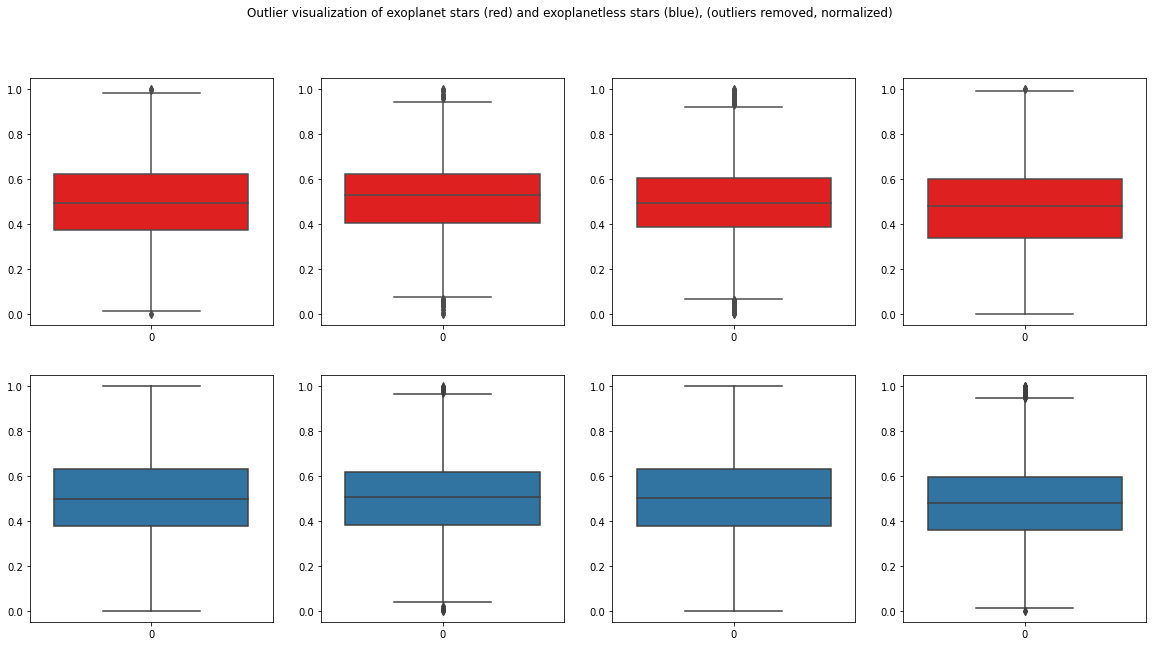

In [20]:
visualize(df_train_final, 'Outlier visualization of exoplanet stars (red) and exoplanetless stars (blue), (outliers removed, normalized)')

**We have now successfully scaled, cleaned and removed outliers. We have a dataframe which is ready for ML.**

Now all that's left is to perform the same process for the test dataset.

In [21]:
df_test

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,1,374.46,326.06,319.87,338.23,251.54,209.84,186.35,167.46,135.45,...,-123.55,-166.90,-222.44,-209.71,-180.16,-166.83,-235.66,-213.63,-205.99,-194.07
566,1,-0.36,4.96,6.25,4.20,8.26,-9.53,-10.10,-4.54,-11.55,...,-12.40,-5.99,-17.94,-11.96,-12.11,-13.68,-3.59,-5.32,-10.98,-11.24
567,1,-54.01,-44.13,-41.23,-42.82,-39.47,-24.88,-31.14,-24.71,-13.12,...,-0.73,-1.64,1.58,-4.82,-11.93,-17.14,-4.25,5.47,14.46,18.70
568,1,91.36,85.60,48.81,48.69,70.05,22.30,11.63,37.86,28.27,...,2.44,11.53,-16.42,-17.86,21.10,-10.25,-37.06,-8.43,-6.48,17.60


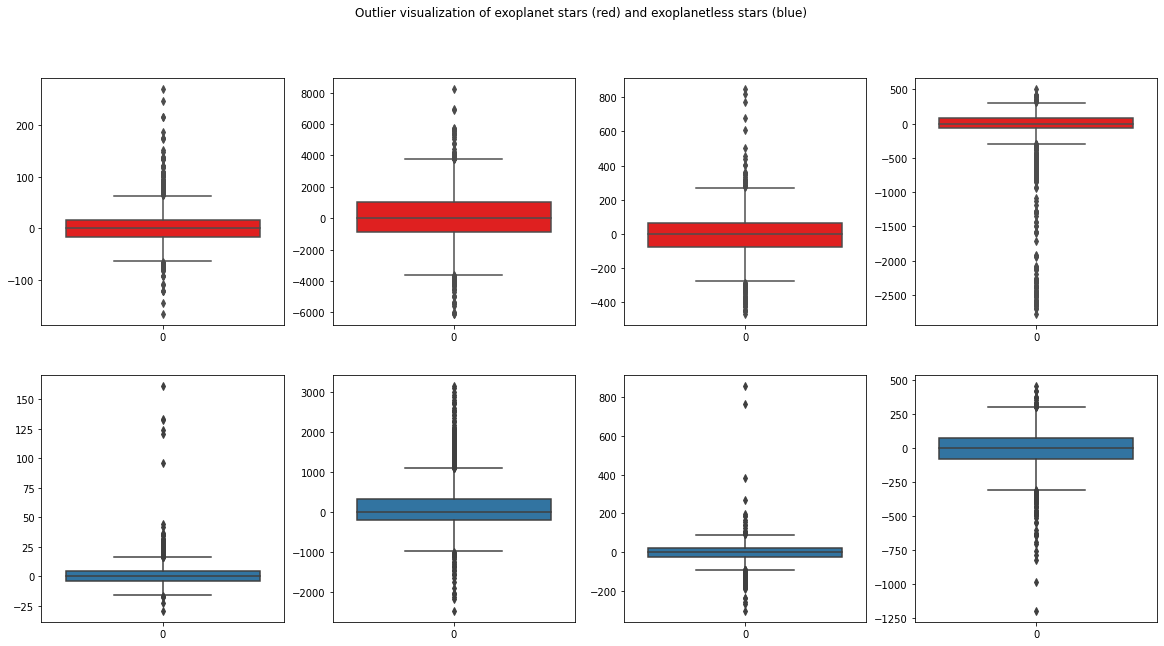

In [22]:
df_test['LABEL'] = df_test['LABEL'].map({2: 1, 1: 0})
visualize(df_test, 'Outlier visualization of exoplanet stars (red) and exoplanetless stars (blue)')

In [23]:
# Remove outliers
rem_outliers_subset_test = Remove_Outliers(df_test)
df_test_clean = df_test[rem_outliers_subset_test]

# Replace NaN values with row mean
for i in range(0, 570):
    rowMean = df_test_clean.iloc[i,:].tail(3197).mean()
    df_test_clean.fillna(value=rowMean, inplace=True)

# Scale
scaler = sklearn.preprocessing.MinMaxScaler()
labelTemp = df_test_clean.iloc[:, 0]
df_test_clean = df_test_clean.transpose()
df_test_scaled = scaler.fit_transform(df_test_clean.tail(3197))
df_test_final = pd.DataFrame(df_test_scaled, columns=df_test_clean.tail(3197).columns)
df_test_final = pd.concat([labelTemp.to_frame().transpose(), df_test_final])
df_test_final = df_test_final.transpose()
df_test_final

,LABEL,0,1,2,3,4,5,6,7,8,...,3187,3188,3189,3190,3191,3192,3193,3194,3195,3196
0,1.0,0.496845,0.496845,0.496845,0.887639,0.867495,0.814541,0.650720,0.559525,0.556771,...,0.618853,0.656385,0.618223,0.491856,0.609489,0.862617,0.755842,0.786136,0.496845,0.958769
1,1.0,0.487354,0.487354,0.487354,0.487354,0.487354,0.487354,0.487354,0.487354,0.487354,...,0.408748,0.354328,0.320932,0.270926,0.240605,0.208585,0.180871,0.167312,0.176964,0.212164
2,1.0,0.503389,0.503389,0.503389,0.503389,0.503389,0.503389,0.503389,0.503389,0.882995,...,0.537668,0.411021,0.417163,0.395837,0.355535,0.187036,0.331602,0.208655,0.438125,0.561018
3,1.0,0.494252,0.494252,0.494252,0.494252,0.494252,0.494252,0.494252,0.494252,0.494252,...,0.697612,0.649281,0.649281,0.609343,0.512054,0.530094,0.529269,0.296666,0.071169,0.140673
4,1.0,0.380945,0.453356,0.473897,0.482425,0.452592,0.428384,0.499144,0.363736,0.486490,...,0.386141,0.312844,0.418908,0.437156,0.398704,0.241044,0.252904,0.312447,0.289950,0.447365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,0.0,0.943977,0.883426,0.875682,0.898651,0.790197,0.738027,0.708640,0.685007,0.644961,...,0.320935,0.266702,0.197218,0.213144,0.250113,0.266789,0.180679,0.208240,0.217798,0.232710
566,0.0,0.514089,0.603321,0.624958,0.590574,0.658672,0.360282,0.350721,0.443979,0.326401,...,0.312144,0.419658,0.219222,0.319524,0.317008,0.290674,0.459913,0.430896,0.335961,0.331600
567,0.0,0.476178,0.476178,0.476178,0.476178,0.476178,0.051697,0.476178,0.054717,0.260615,...,0.480725,0.464559,0.521762,0.408065,0.281755,0.189199,0.418192,0.590869,0.750577,0.825902
568,0.0,0.973911,0.943977,0.752780,0.752157,0.863164,0.615009,0.559557,0.695874,0.646035,...,0.511797,0.559038,0.413782,0.406299,0.608772,0.445848,0.306517,0.455306,0.465440,0.590583


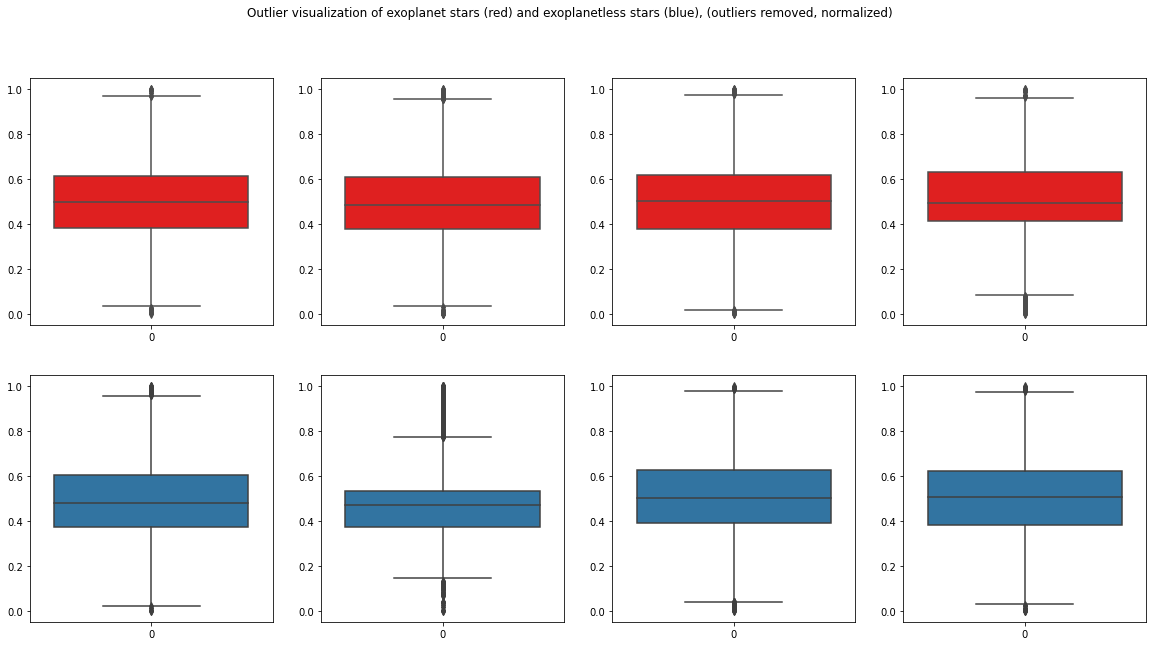

In [24]:
visualize(df_test_final, 'Outlier visualization of exoplanet stars (red) and exoplanetless stars (blue), (outliers removed, normalized)')

## 3. Machine learning

Let's explore what we can actually discover from this dataset. As it is a labeled dataset, there are some algorithms which will perform better. Let's start with the first algorithm that we learned, and by far the simplest one - Nearest neighbours.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier()

x_train = df_train_final.drop(["LABEL"],axis=1)
y_train = df_train_final["LABEL"]   
x_test = df_test_final.drop(["LABEL"],axis=1)
y_test = df_test_final["LABEL"]

In [26]:
knn.fit(x_train, y_train)
predict = knn.predict(x_test)
accuracy_score(y_true=y_test, y_pred=predict)

0.9912280701754386

On first glance, it seems that the model has a 99.1% accuracy! However if we take a look at the actual predicted array, we see that every single predicted value is 0, therefore that accuracy is simply the 565 "correct" no-exoplanet predictions.

In [27]:
for prediction in predict:
    if prediction != 0:
        print(prediction)

As we can see, that above for-loop returns nothing, meaning that the entire prediction is 0. In order to avoid this problem in the future, I will create my own wrapper function to print out the predicted accuracy of ONLY the true exoplanets.

In [28]:
def accuracy_score_true_exoplanets(y_predicted):
    # From the dataset specification, we know that the first 5 entries are exoplanets, therefore we take those 5 to compare against.
    y = df_test_final['LABEL'].iloc[0:5]
    print("Prediction accuracy of exoplanets is: " + str(100 * accuracy_score(y_true=y, y_pred=y_predicted[0:5])) + "%")

Now let's test our new function

In [29]:
accuracy_score_true_exoplanets(predict)

Prediction accuracy of exoplanets is: 0.0%


Let's try one more algorithm - Decision trees.

In [30]:
from sklearn.tree import DecisionTreeClassifier
trees = DecisionTreeClassifier(max_depth=7, random_state=42)

trees.fit(x_train, y_train)
predict = trees.predict(x_test)
print(accuracy_score(y_true=y_test, y_pred=predict))
accuracy_score_true_exoplanets(predict)

0.9842105263157894
Prediction accuracy of exoplanets is: 0.0%


Again, we get much of the same - a seemingly high overall prediction score, but with 0% exoplanet accuracy. After doing some research about why this could happen, I think the main problem here is that our dataset is extremely imbalanced. That means that there are vastly more no-exoplanet stars that the opposite:

In [31]:
print("There are ~" + 
      str(int(len(df_train_final[df_train_final['LABEL'] == 0]) / len(df_train_final[df_train_final['LABEL'] == 1]))) +
     " times more exoplanet negative stars than there are exoplanet positive stars.")

There are ~136 times more exoplanet negative stars than there are exoplanet positive stars.


This giant imbalance in the data means that any algorithm we train will be severely biased towards the majority label.

To quote from [section.io](https://www.section.io/engineering-education/imbalanced-data-in-ml/):

**"One might end up with a scenario where a model assumes that any data you feed it belongs to the majority class."**

Which, I believe, is exactly what is happening here.

## 3.1 Data imbalance solution

So, how can we fix this problem? The easiest solution is oversampling. The way this works, is by synthetically replicating pieces of the minority class, until we have sufficient entries to run ML. Using this method does not introduce any 'new' data into the dataframe, it simply multiplies the exisiting data in a smart way. I will be using SMOTE, which is a popular and very powerful oversampling tool.

In [32]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=42)

x_train_OS, y_train_OS = oversampler.fit_resample(df_train_final.drop('LABEL',axis=1), df_train_final['LABEL'])

Let's see what the process accomplished:

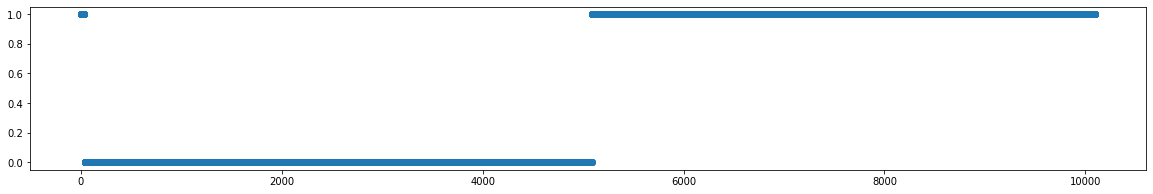

In [33]:
plt.figure(figsize=(20,3))
plt.scatter(range(0, 10100), y_train_OS)

As we can see, we now have twice as many values in our resulting dataset. We can also see that the oversampler added all new synthetic values at the end of the old dataset. We are now ready to return to ML.

## 3.2 Balanced dataset machine learning

Let's try the nearest neighbor algorithm again.

In [34]:
knn = KNeighborsClassifier()

knn.fit(x_train_OS, y_train_OS)
predict_knn = knn.predict(x_test)
print(accuracy_score(y_true=y_test, y_pred=predict_knn))
accuracy_score_true_exoplanets(predict_knn)

0.6894736842105263
Prediction accuracy of exoplanets is: 60.0%


We can see that we now accurately predict 3/5 exoplanet stars in our test set, however our overall score has went down considerably. This means that we likely have quite a few false positives. Let's visualize this using a confusion matrix.

<AxesSubplot:>

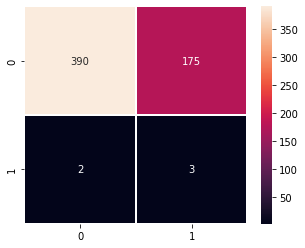

In [35]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,predict_knn),annot=True,fmt = "d",linecolor="w",linewidths=2)

This tells us that there are a whopping 175 false positives, and the 2 false negatives that we expected from our accuracy score. 

Let's also try the decision tree algorithm.

In [36]:
trees = DecisionTreeClassifier(max_depth=4, random_state=42)

trees.fit(x_train_OS, y_train_OS)
predict_trees = trees.predict(x_test)
print(accuracy_score(y_true=y_test, y_pred=predict_trees))
accuracy_score_true_exoplanets(predict_trees)

0.8157894736842105
Prediction accuracy of exoplanets is: 60.0%


<AxesSubplot:>

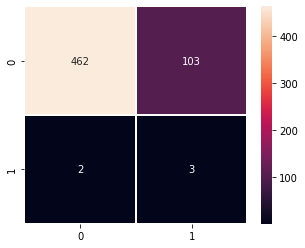

In [37]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,predict_trees),annot=True,fmt = "d",linecolor="w",linewidths=2)

Here, we get a relatively similar result - 3/5 exoplanet stars were predicted correctly. Additionally, we have significantly less false positives, leading to a better overall score. Let's take a look at both algorithms' predictions of the 5 exoplanet stars.

<BarContainer object of 5 artists>

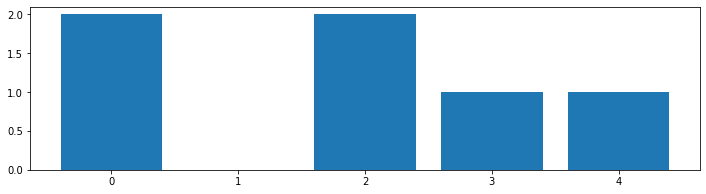

In [38]:
values = [0, 0, 0, 0, 0]
for i in range(0, 5):
    values[i] = predict_knn[i] + predict_trees[i]
    
plt.figure(figsize=(12,3))
plt.bar(range(0, 5), values)

This tells us that stars 0 and 2 were predicted correcty by both algorithms, stars 3 and 4 were predicted only by one algorithm and star 1 was predicted by neither.

Overall, our prediction accuracy is still not very good. In particular, our algorithms seem to misindetify a lot of exoplanet negative stars as exoplanet positive. There is one final trick up our sleeves however - frequency analysis.

## 4. Frequency analysis

An exoplanet passing infront of its parent star results in a change of the observed FLUX value. That said, this change is likely going to occur at a very specific and stable period. Picture Earth - an observer from a far away solar system, looking at ours, would see a dip in the FLUX value of the Sun every 365 days (if we ignore all the other planets and orbiting bodies). This periodic change is characterized by having a significantly lower Hertz value than simple measurement noise, which is how we can differentiate exoplanets from random noise.

By analysing the frequencies using a Fourier transform (a method for computing an aperiodic function to its compound periodic products), we can see which particular frequencies are more pronounced and use them as an additional helper for ML. This is how we quantify the degree of periodicity of a certain system.

Let's create a frequency spectrum analysis of our stars and see if we can spot any characteristic features in exoplanet stars compared to their counterparts.

In [39]:
import scipy
from scipy import fft

df_fourier_transforms = pd.DataFrame()
row_length = len(x_train_OS.iloc[0, :])
for i in range(0, 10100):
    ft_temp = np.abs(scipy.fft.fft(x_train_OS.iloc[i, :].values, n=row_length))
    df_fourier_transforms = pd.concat([df_fourier_transforms, pd.DataFrame(ft_temp).transpose()], ignore_index=True)
    
# This frequency is calculated based on the fact that one row of observations is made in roughly 80 days by the Kepler telescope
# That means that a single observation is made every 80d * 24h * 60m / 3198columns, or roughly every 36 minutes.
freq = np.arange(len(x_train_OS.iloc[0, 1:]) * (1/(36.0*60.0)), step=(1/(36.0*60.0)))

We now have a complete dataframe of every single row's fourier transform. Something to note here is the first column - its value is significantly higher than the rest of the row, but this is actually expected behaviour. What it actually represents is the sum of all fourier functions. That said, I am going to ignore it as it can mess up visualizations of the frequency spectrums.

In [40]:
df_fourier_transforms

,0,1,2,3,4,5,6,7,8,9,...,3187,3188,3189,3190,3191,3192,3193,3194,3195,3196
0,1607.333015,3.577280,62.747805,61.995316,222.781699,30.608687,28.980593,19.338967,28.480377,24.487810,...,0.352757,24.487810,28.480377,19.338967,28.980593,30.608687,222.781699,61.995316,62.747805,3.577280
1,1648.979426,126.893054,80.539517,90.186813,30.632676,54.014300,42.540880,35.145467,40.866019,35.146129,...,43.278180,35.146129,40.866019,35.145467,42.540880,54.014300,30.632676,90.186813,80.539517,126.893054
2,1580.710628,61.132835,43.148666,203.541724,85.220166,108.250797,81.020735,42.236920,39.001342,40.542270,...,49.069455,40.542270,39.001342,42.236920,81.020735,108.250797,85.220166,203.541724,43.148666,61.132835
3,1496.132000,21.017985,70.536674,117.882273,102.443217,311.421126,80.690959,78.369930,48.264982,31.405370,...,24.102307,31.405370,48.264982,78.369930,80.690959,311.421126,102.443217,117.882273,70.536674,21.017985
4,1754.855994,152.649288,64.321672,191.016531,189.557098,133.874204,146.560819,42.336208,46.276825,94.737757,...,4.482312,94.737757,46.276825,42.336208,146.560819,133.874204,189.557098,191.016531,64.321672,152.649288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,1596.079240,38.774559,83.265899,214.587122,24.638915,28.769735,94.454178,39.439690,22.490979,32.740184,...,17.917725,32.740184,22.490979,39.439690,94.454178,28.769735,24.638915,214.587122,83.265899,38.774559
10096,1612.772340,23.858016,104.567783,149.044287,50.083791,88.265304,31.406504,63.011054,54.649531,43.449023,...,32.171547,43.449023,54.649531,63.011054,31.406504,88.265304,50.083791,149.044287,104.567783,23.858016
10097,1644.805194,117.028380,72.913433,85.723045,33.235133,60.247526,41.222512,27.012044,40.247907,33.133736,...,35.296152,33.133736,40.247907,27.012044,41.222512,60.247526,33.235133,85.723045,72.913433,117.028380
10098,1612.530287,59.530051,262.070476,98.221560,29.476572,10.697208,44.256532,31.048755,33.249993,19.609279,...,23.528680,19.609279,33.249993,31.048755,44.256532,10.697208,29.476572,98.221560,262.070476,59.530051


Now let's visualize two of these transforms - one from an exoplanet positive star, and one from an exoplanet negative star.

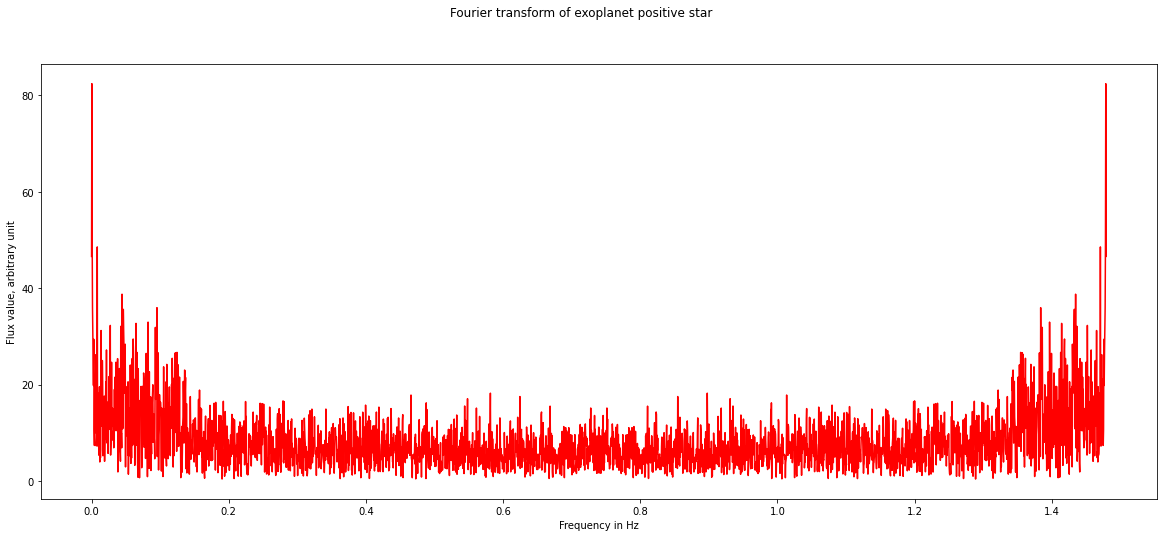

In [41]:
plt.figure(figsize=(20,8))
plt.suptitle("Fourier transform of exoplanet positive star")
plt.xlabel("Frequency in Hz")
plt.ylabel("Flux value, arbitrary unit")
plt.plot(freq, df_fourier_transforms.iloc[6, 1:], 'r')

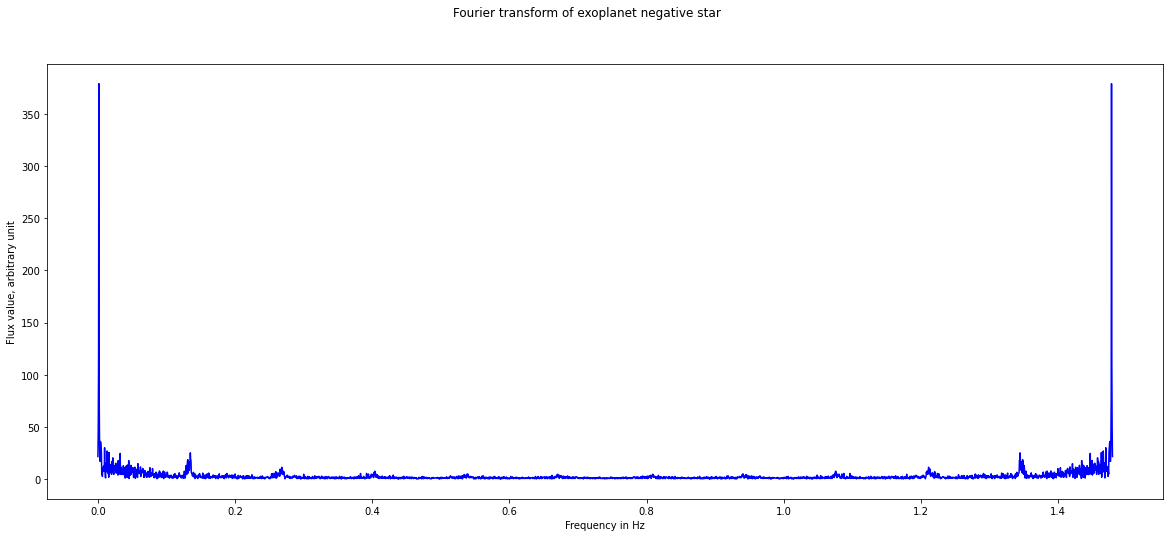

In [42]:
plt.figure(figsize=(20,8))
plt.suptitle("Fourier transform of exoplanet negative star")
plt.xlabel("Frequency in Hz")
plt.ylabel("Flux value, arbitrary unit")
plt.plot(freq, df_fourier_transforms.iloc[999, 1:], 'b')

We can make two observations here:
1. The entire spectrum is mirrored, which is expected, as that's how Fourier transforms work.
2. There appears to be a noticeable bump in the low frequencies of both graphs, but the exoplanet negative one also features some key bumps in higher frequencies.
    
The lower-frequency bumps *may* be associated with exoplanet orbiting behaviour, while mid-high frequencies are likely caused by signal interference and noise. Hopefully, we can use this information in order to improve prediciton accuracy.

Let's remove the second half of all spectra, as they are symmetrical.

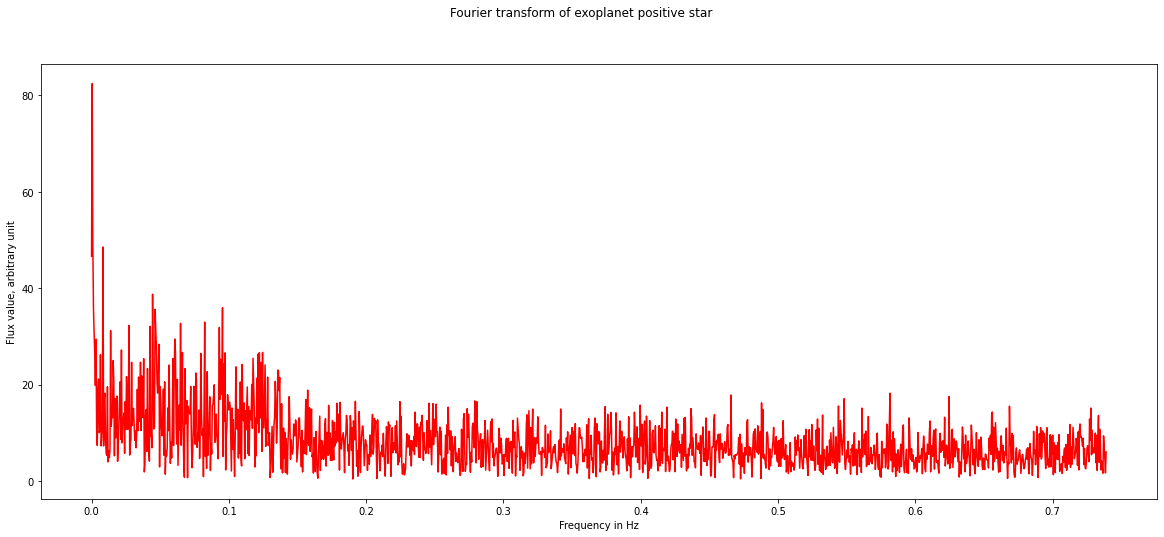

In [43]:
df_fourier_transforms_true = df_fourier_transforms.iloc[:,:(df_fourier_transforms.shape[1]//2)]
freq_true = np.arange(len(df_fourier_transforms_true.iloc[0, 1:]) * (1/(36.0*60.0)), step=(1/(36.0*60.0)))

plt.figure(figsize=(20,8))
plt.suptitle("Fourier transform of exoplanet positive star")
plt.xlabel("Frequency in Hz")
plt.ylabel("Flux value, arbitrary unit")
plt.plot(freq_true, df_fourier_transforms_true.iloc[6, 1:], 'r')

Now let's create the fourier transform set of our test data.

In [44]:
df_fourier_transforms_test = pd.DataFrame()
row_length = len(x_test.iloc[0, :])
for i in range(0, 570):
    ft_temp = np.abs(scipy.fft.fft(x_test.iloc[i, :].values, n=row_length))
    df_fourier_transforms_test = pd.concat([df_fourier_transforms_test, pd.DataFrame(ft_temp).transpose()], ignore_index=True)
    
df_fourier_transforms_test_true = df_fourier_transforms_test.iloc[:,:(df_fourier_transforms_test.shape[1]//2)]
df_fourier_transforms_test_true

,0,1,2,3,4,5,6,7,8,9,...,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597
0,1588.414279,72.617501,111.343310,45.375824,44.907927,55.256690,26.205560,11.869013,15.970643,29.410546,...,3.341915,2.369882,2.574713,4.161158,1.074477,1.390535,6.018715,4.946571,5.835896,11.931484
1,1593.346853,228.946800,54.676578,20.542460,41.294091,40.653682,111.993502,37.379098,27.910011,40.238909,...,1.560788,2.071268,4.419702,4.330631,1.199913,0.961272,3.231061,3.645532,4.220338,7.209718
2,1586.371311,225.715922,60.337247,28.858290,22.822697,93.325070,37.011890,47.719890,18.464658,23.730745,...,3.852517,2.210411,4.008514,2.516102,4.890586,7.014642,0.460375,4.217513,4.770202,4.125580
3,1656.494794,121.269176,52.755771,30.050656,37.194361,37.809599,40.926424,23.689386,21.529652,23.527605,...,4.005113,3.622120,4.089506,1.096605,2.903820,1.741236,4.877880,0.501577,12.572363,0.851685
4,1657.479885,69.802687,30.414477,36.295698,123.251481,167.338620,81.032059,110.011166,47.797040,52.864604,...,3.018181,3.307028,3.635106,4.175797,1.721125,3.360270,3.108698,4.218479,2.133012,0.506591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,1530.607805,10.840974,66.163776,218.874294,75.827666,157.960824,110.430572,141.709794,24.901452,27.869321,...,3.256369,2.373022,4.299939,3.035347,2.968318,5.172805,1.964033,3.413214,5.425424,2.773339
566,1624.872570,128.983233,190.920935,21.082645,76.133862,31.571478,34.177894,38.276621,24.012816,43.246566,...,3.962192,4.050729,6.753106,6.360919,5.073273,6.654437,7.800451,5.856159,3.862134,3.202573
567,1577.806018,67.645195,42.819956,58.869203,94.909494,30.848222,21.292494,14.641814,27.502529,13.415225,...,8.785860,10.548786,9.585072,2.943603,7.224434,2.165105,10.435497,2.381219,3.222190,4.839598
568,1603.689055,10.668430,10.477805,46.323474,56.817512,71.214139,7.758889,31.258425,22.916274,8.176219,...,7.345465,5.949904,1.450560,9.201984,4.001013,6.398850,5.929380,2.837364,3.847909,6.235851


## 5. Final evaluation and machine learning

Now that we have all of this new data, we can use it to train our algorithms and compare the scores.

In [45]:
knn = KNeighborsClassifier()

knn.fit(df_fourier_transforms_true, y_train_OS)
predict_knn = knn.predict(df_fourier_transforms_test_true)
print(accuracy_score(y_true=y_test, y_pred=predict_knn))
accuracy_score_true_exoplanets(predict_knn)

0.8333333333333334
Prediction accuracy of exoplanets is: 60.0%


<AxesSubplot:>

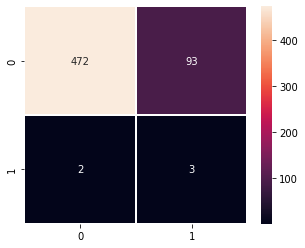

In [46]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,predict_knn),annot=True,fmt = "d",linecolor="w",linewidths=2)

Wow! While the exoplanet positive predictions are identical to the original data, we see a massive improvement in the false positives - we have cut them down from 175 to 93, that's roughly a 47% improvement!

Let's do the same with the decision trees algorithm.

In [47]:
trees = DecisionTreeClassifier(max_depth=4, random_state=42)

trees.fit(df_fourier_transforms_true, y_train_OS)
predict_trees = trees.predict(df_fourier_transforms_test_true)
print(accuracy_score(y_true=y_test, y_pred=predict_trees))
accuracy_score_true_exoplanets(predict_trees)

0.8859649122807017
Prediction accuracy of exoplanets is: 20.0%


<AxesSubplot:>

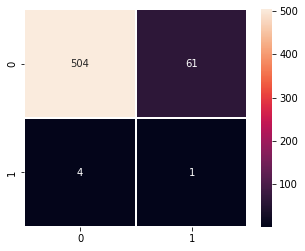

In [48]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,predict_trees),annot=True,fmt = "d",linecolor="w",linewidths=2)

This algorithm doesn't work quite as well as KNN. While the false positives are down by about 37%, we've also lost a lot of accuracy in the true positives, where the algorithm only recognizes a singular exoplanet star.

There is still one final thing to try here - combining both the original, oversampled data with its fourier transform. This should give the algorithms the largest amount of data to learn from, and hopefully boost their performance.

In [49]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

x_train_joined = x_train_OS.join(df_fourier_transforms_true, lsuffix='_raw', rsuffix='_ft')
x_test_joined = x_test.join(df_fourier_transforms_test_true, lsuffix='_raw', rsuffix='_ft')

In [50]:
knn = KNeighborsClassifier()

knn.fit(x_train_joined, y_train_OS)
predict_knn = knn.predict(x_test_joined)
print(accuracy_score(y_true=y_test, y_pred=predict_knn))
accuracy_score_true_exoplanets(predict_knn)

0.8333333333333334
Prediction accuracy of exoplanets is: 60.0%


<AxesSubplot:>

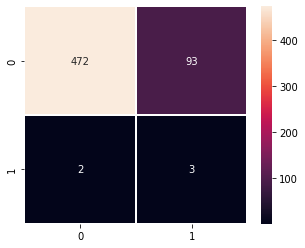

In [51]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,predict_knn),annot=True,fmt = "d",linecolor="w",linewidths=2)

With KNN, we see no changes at all. 

In [52]:
trees = DecisionTreeClassifier(max_depth=4, random_state=42)

trees.fit(x_train_joined, y_train_OS)
predict_trees = trees.predict(x_test_joined)
print(accuracy_score(y_true=y_test, y_pred=predict_trees))
accuracy_score_true_exoplanets(predict_trees)

0.8929824561403509
Prediction accuracy of exoplanets is: 20.0%


<AxesSubplot:>

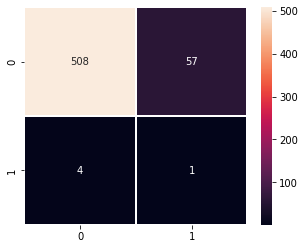

In [53]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,predict_trees),annot=True,fmt = "d",linecolor="w",linewidths=2)

We see a marginal increase in performance here, but nothing significant. After trying out different max_depth values, I found that 9 performs significantly better. Additionally, for KNN a neighbors value of 4 gives us a slight boost in performance as well. Here is a quick run-through of some of the different values and their results.

In [65]:
for i in range(1, 10):
    print("Accuracy of n_neighbors = " + str(i))
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_joined, y_train_OS)
    predict_knn = knn.predict(x_test_joined)
    print(accuracy_score(y_true=y_test, y_pred=predict_knn))
    accuracy_score_true_exoplanets(predict_knn)
    print()

Accuracy of n_neighbors = 1
0.9192982456140351
Prediction accuracy of exoplanets is: 40.0%

Accuracy of n_neighbors = 2
0.9245614035087719
Prediction accuracy of exoplanets is: 40.0%

Accuracy of n_neighbors = 3
0.8666666666666667
Prediction accuracy of exoplanets is: 60.0%

Accuracy of n_neighbors = 4
0.868421052631579
Prediction accuracy of exoplanets is: 60.0%

Accuracy of n_neighbors = 5
0.8333333333333334
Prediction accuracy of exoplanets is: 60.0%

Accuracy of n_neighbors = 6
0.8403508771929824
Prediction accuracy of exoplanets is: 60.0%

Accuracy of n_neighbors = 7
0.7859649122807018
Prediction accuracy of exoplanets is: 60.0%

Accuracy of n_neighbors = 8
0.7947368421052632
Prediction accuracy of exoplanets is: 60.0%

Accuracy of n_neighbors = 9
0.7631578947368421
Prediction accuracy of exoplanets is: 60.0%



In [66]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train_joined, y_train_OS)
predict_knn = knn.predict(x_test_joined)

<AxesSubplot:>

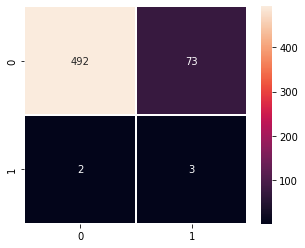

In [67]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,predict_knn),annot=True,fmt = "d",linecolor="w",linewidths=2)

In [68]:
for i in range(1, 12):
    print("Accuracy of n_neighbors = " + str(i))
    trees = DecisionTreeClassifier(max_depth=i, random_state=42)
    trees.fit(x_train_joined, y_train_OS)
    predict_trees = trees.predict(x_test_joined)
    print(accuracy_score(y_true=y_test, y_pred=predict_trees))
    accuracy_score_true_exoplanets(predict_trees)
    print()

Accuracy of n_neighbors = 1
0.6684210526315789
Prediction accuracy of exoplanets is: 60.0%

Accuracy of n_neighbors = 2
0.7894736842105263
Prediction accuracy of exoplanets is: 20.0%

Accuracy of n_neighbors = 3
0.8298245614035088
Prediction accuracy of exoplanets is: 40.0%

Accuracy of n_neighbors = 4
0.8929824561403509
Prediction accuracy of exoplanets is: 20.0%

Accuracy of n_neighbors = 5
0.9210526315789473
Prediction accuracy of exoplanets is: 40.0%

Accuracy of n_neighbors = 6
0.9421052631578948
Prediction accuracy of exoplanets is: 40.0%

Accuracy of n_neighbors = 7
0.9473684210526315
Prediction accuracy of exoplanets is: 20.0%

Accuracy of n_neighbors = 8
0.9543859649122807
Prediction accuracy of exoplanets is: 40.0%

Accuracy of n_neighbors = 9
0.9631578947368421
Prediction accuracy of exoplanets is: 40.0%

Accuracy of n_neighbors = 10
0.9543859649122807
Prediction accuracy of exoplanets is: 40.0%

Accuracy of n_neighbors = 11
0.9614035087719298
Prediction accuracy of exoplane

In [69]:
trees = DecisionTreeClassifier(max_depth=9, random_state=42)
trees.fit(x_train_joined, y_train_OS)
predict_trees = trees.predict(x_test_joined)

An interesting thing to note here is that while with the KNN algorithm Overall accuracy and Exoplanet accuracy seem to have an almost inverse relationship to a growing i value, with the Trees algorithm both prediction scores steadily rise along with the i value.

<AxesSubplot:>

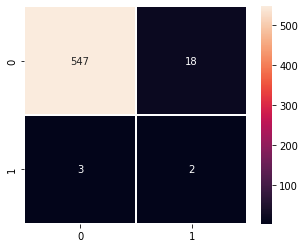

In [70]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,predict_trees),annot=True,fmt = "d",linecolor="w",linewidths=2)

I think it's adequate to combine both prediction scores here. There are two methods of doing this - AND or OR. The former will give us a exoplanet-negative-biased result, while the latter will be more likely to correctly predict exoplanet-positive stars, at the cost of more false positives. I opted for the latter.

In [58]:
both = np.bitwise_or(np.array(predict_knn, dtype='int'), np.array(predict_trees, dtype='int'))

<AxesSubplot:>

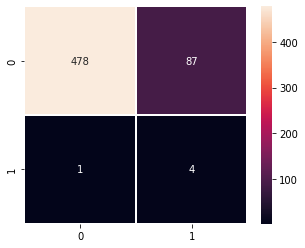

In [59]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,both),annot=True,fmt = "d",linecolor="w",linewidths=2)

This is the final result. We have correctly predicted 4 out of the 5 exoplanet stars, while having 87 false positives. 

In [60]:
print(classification_report(y_test,both))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92       565
         1.0       0.04      0.80      0.08         5

    accuracy                           0.85       570
   macro avg       0.52      0.82      0.50       570
weighted avg       0.99      0.85      0.91       570



## 6. Conclusion

I went through a lot of different notebooks, examples, explanations and general information regarding this dataset. Overall, my code achieves a very competitive weighted accuracy of 85%. A lot of other people's solutions involve neural networks, which offer a significant accuracy boost, but that's a whole different league of machine learning. For strictly no-NN algorithms, my accuracy is actually better than most of the other notebooks I researched.

I believe that I've thoroughly explored every single stage of the AI methodology - from Domain Understanding, to Data Collection and Preparation, to Modelling, Evaluation and Iteration. I'm happy with the final result.

## 6.1 Research methodology

During this project, I had to employ many different reseach methods in order to be able to approach each individual part of this project with the utmost knowledge. Overall, I think the most common research method was Library research (as per the DOT framework). I thoroughly explored other people's solutions of this dataset, both bad and good. I went over not just the code, but also the explanations and comments of other users. I used references for the overall approach to the dataset, as well as individual components for better data processing. 

Additionally, there was also a lot of Workshop research done, where I meticulously tested each part of my code, to ensure that it does precisely what I want. I iterated on different machine learning algorithms, such in my three machine learning sections, each improving upon the last's results. I believe that in a project like this, both of these research methods are very fitting, as a simple cycle of "read what others have done -> iterate on it yourself" is very beneficial for machine learning projects as a whole.